In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/HCD(Preprocessed) (1).csv')

In [ ]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000.0,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Y,3,DEFAULT
1,2.0,21,9600.0,OWN,5.0,EDUCATION,A,1000.0,11.14,1,Unknown,2,NO DEFAULT
2,3.0,25,9600.0,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,DEFAULT
3,4.0,23,65500.0,RENT,4.0,MEDICAL,B,35000.0,15.23,10,N,2,DEFAULT
4,5.0,24,54400.0,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Y,4,DEFAULT


In [ ]:
df.tail()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
28633,32577.0,57,53000.0,MORTGAGE,1.0,PERSONAL,C,5800.0,13.16,7,Unknown,30,NO DEFAULT
28634,32578.0,54,120000.0,MORTGAGE,4.0,PERSONAL,A,17625.0,7.49,4,Unknown,19,NO DEFAULT
28635,32579.0,65,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,35000.0,10.99,5,N,28,DEFAULT
28636,32580.0,56,150000.0,MORTGAGE,5.0,PERSONAL,B,15000.0,11.48,6,Unknown,26,NO DEFAULT
28637,32581.0,99,42000.0,RENT,2.0,MEDICAL,B,6475.0,9.99,6,Unknown,30,NO DEFAULT


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28638 entries, 0 to 28637
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          28638 non-null  float64
 1   customer_age         28638 non-null  int64  
 2   customer_income      28638 non-null  float64
 3   home_ownership       28638 non-null  object 
 4   employment_duration  28638 non-null  float64
 5   loan_intent          28638 non-null  object 
 6   loan_grade           28638 non-null  object 
 7   loan_amnt            28638 non-null  float64
 8   loan_int_rate        28638 non-null  float64
 9   term_years           28638 non-null  int64  
 10  historical_default   28638 non-null  object 
 11  cred_hist_length     28638 non-null  int64  
 12  Current_loan_status  28638 non-null  object 
dtypes: float64(5), int64(3), object(5)
memory usage: 2.8+ MB


In [ ]:
df.describe()

,customer_id,customer_age,customer_income,employment_duration,loan_amnt,loan_int_rate,term_years,cred_hist_length
count,28638.000000,28638.000000,2.863800e+04,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000
mean,16291.223479,27.724981,6.665115e+04,4.789126,9.846346e+03,11.039523,4.771423,5.793177
std,9388.024697,6.325201,6.235844e+04,4.154982,2.310646e+04,3.229479,2.472164,4.038774
min,1.000000,3.000000,4.000000e+03,0.000000,5.000000e+02,5.420000,1.000000,2.000000
25%,8158.250000,23.000000,3.945600e+04,2.000000,5.000000e+03,7.900000,3.000000,3.000000
50%,16279.500000,26.000000,5.591000e+04,4.000000,8.000000e+03,10.990000,4.000000,4.000000
75%,24434.750000,30.000000,8.000000e+04,7.000000,1.250000e+04,13.480000,7.000000,8.000000
max,32581.000000,144.000000,6.000000e+06,123.000000,3.500000e+06,23.220000,10.000000,30.000000


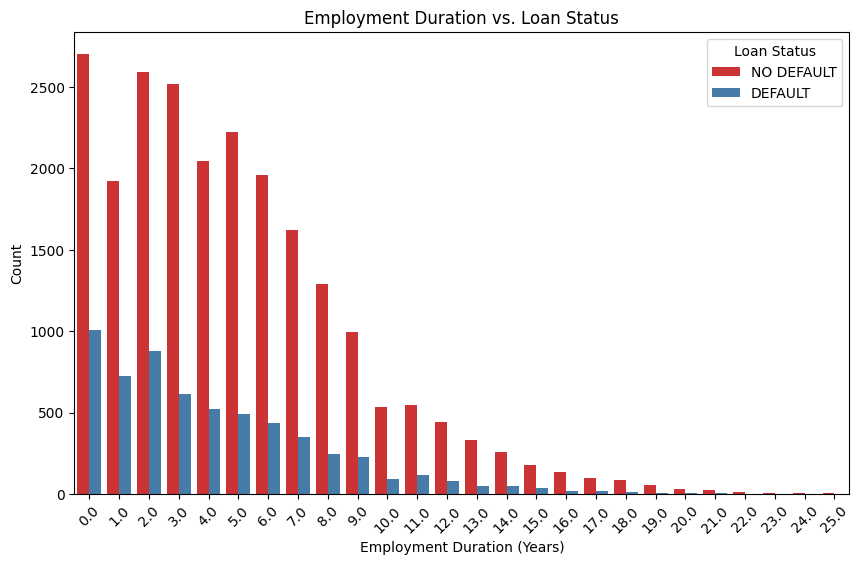

In [ ]:
filtered_df = df[df['employment_duration'] <= 25]

plt.figure(figsize=(10, 6))
sns.countplot(x='employment_duration', hue='Current_loan_status', data=filtered_df, palette='Set1')
plt.title('Employment Duration vs. Loan Status')
plt.xlabel('Employment Duration (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()


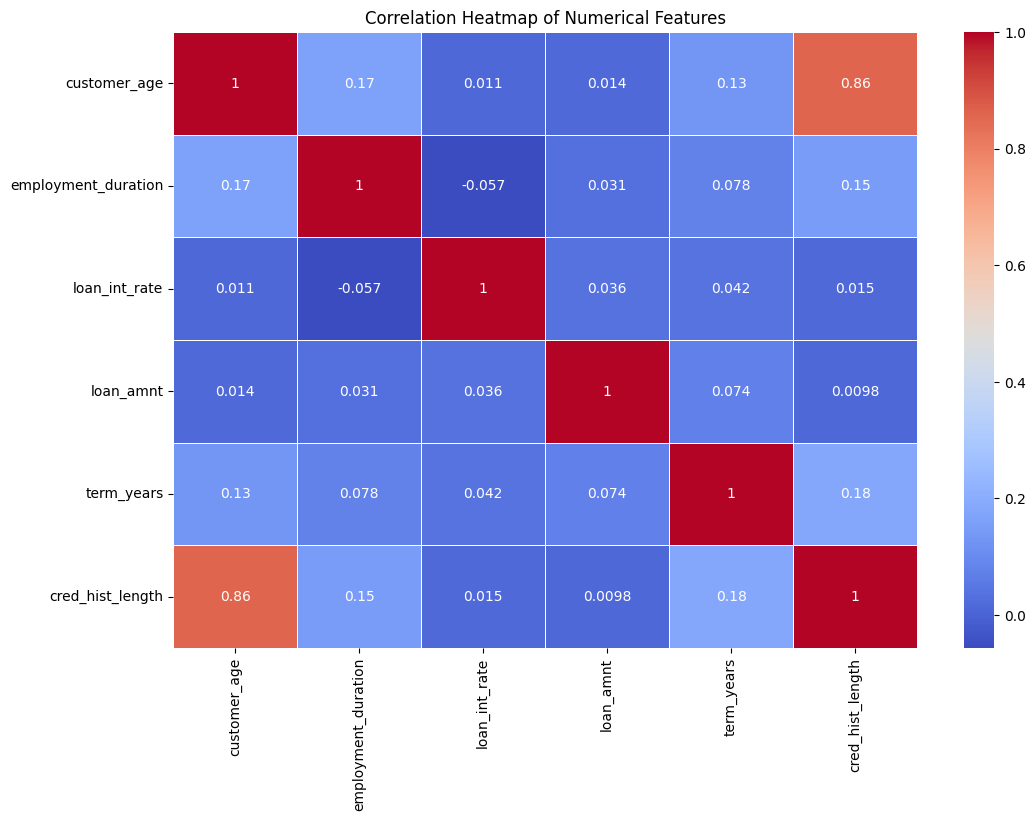

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


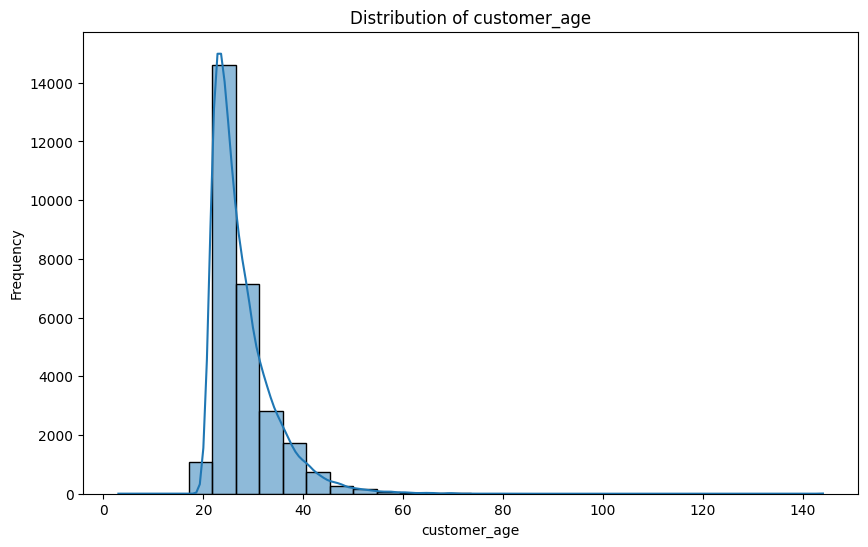

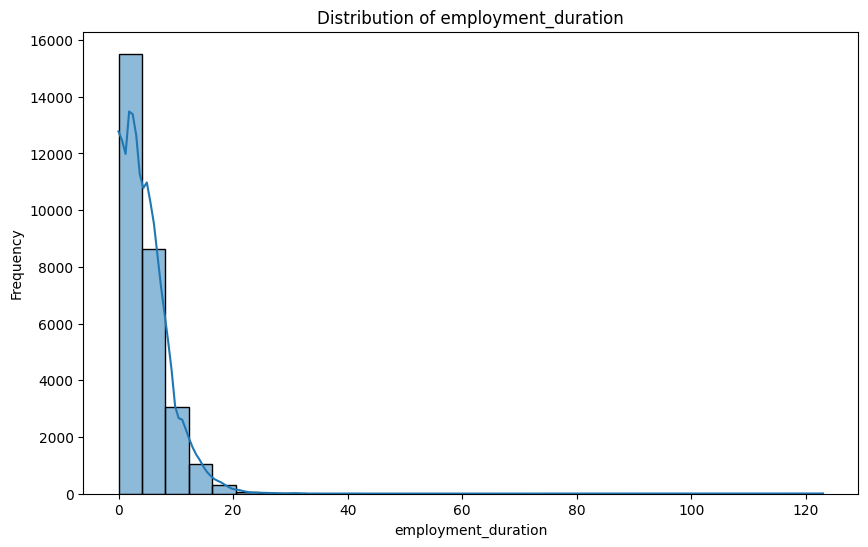

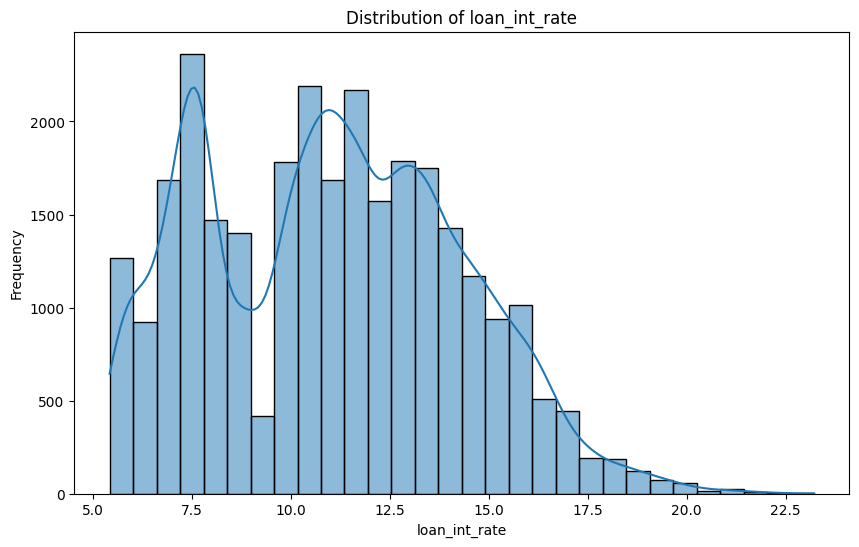

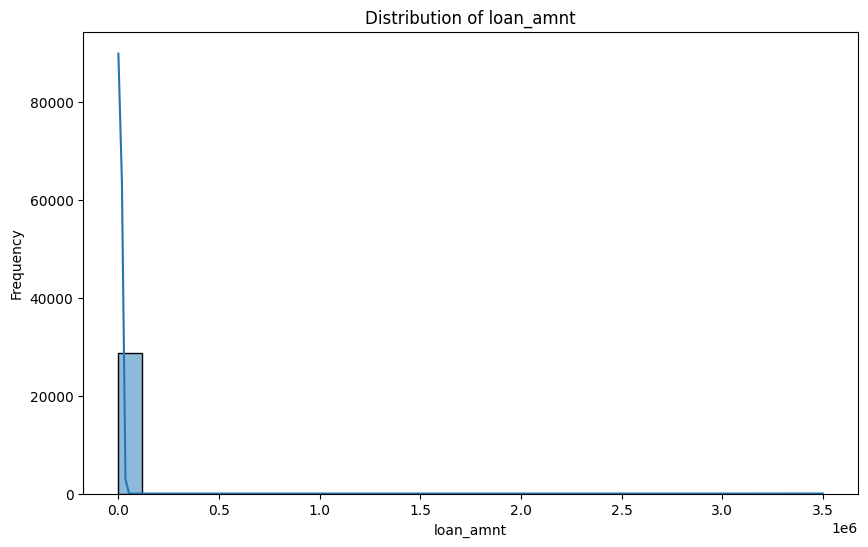

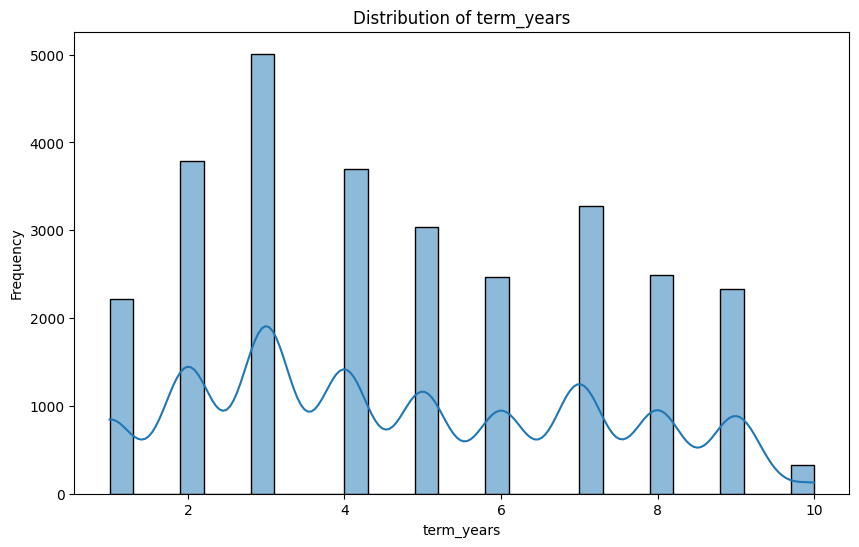

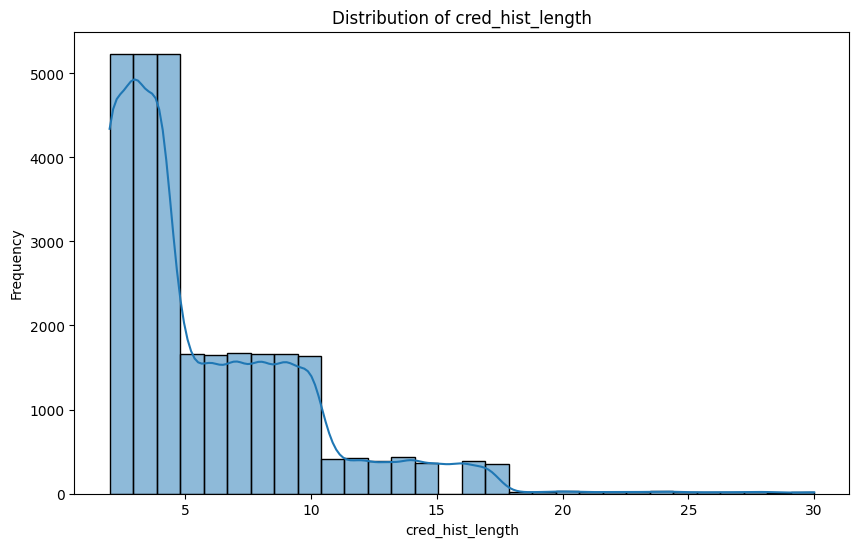

In [ ]:
numerical_cols = ['customer_age', 'employment_duration', 'loan_int_rate', 'loan_amnt', 'term_years', 'cred_hist_length']


for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

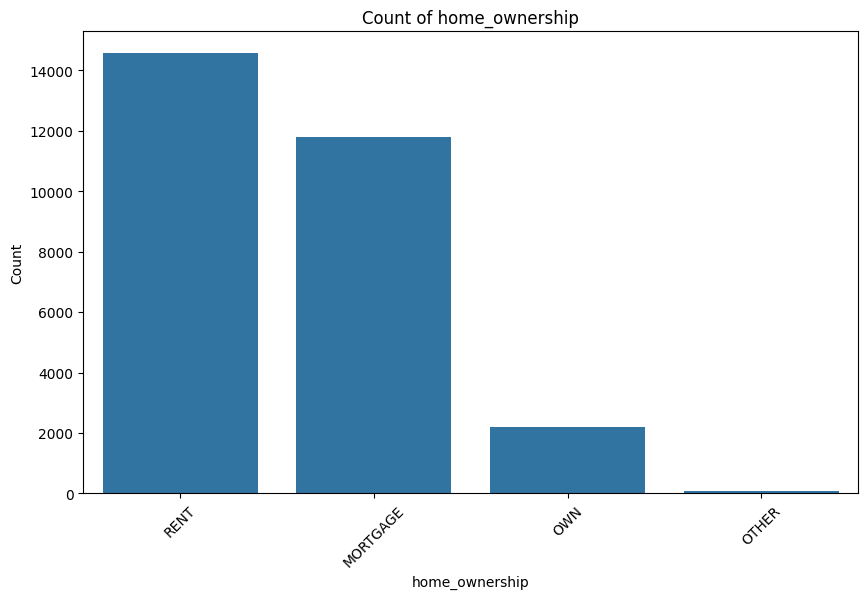

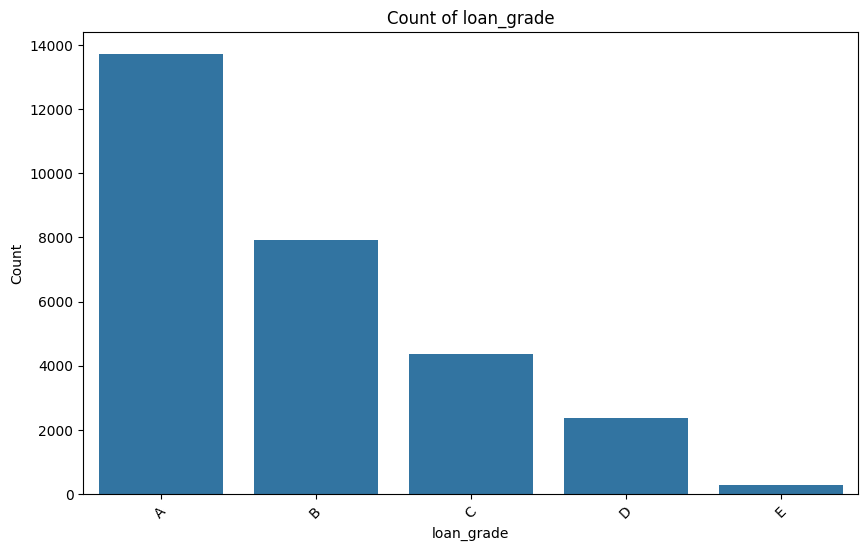

In [ ]:
categorical_cols = ['home_ownership', 'loan_grade']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

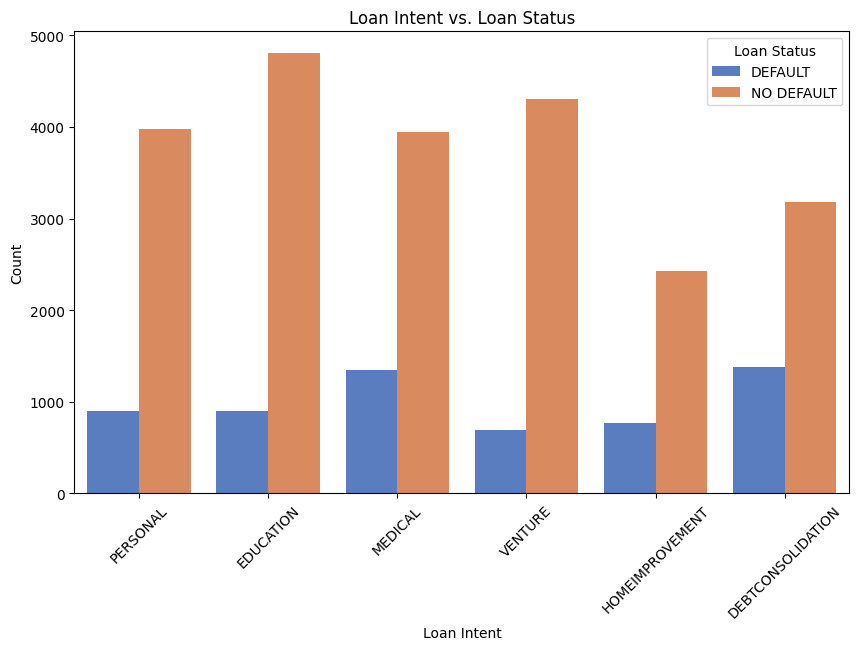

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_intent', hue='Current_loan_status', data=df, palette='muted')
plt.title('Loan Intent vs. Loan Status')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()
